<a href="https://colab.research.google.com/github/Alpha-Leporis/breast_cancer_detection/blob/main/notebooks/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Alpha-Leporis/breast_cancer_detection.git

Cloning into 'breast_cancer_detection'...
remote: Enumerating objects: 1622, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1622 (delta 7), reused 13 (delta 5), pack-reused 1602
Receiving objects: 100% (1622/1622), 194.53 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Updating files: 100% (1589/1589), done.


In [ ]:
%cd breast_cancer_detection

/content/breast_cancer_detection


In [ ]:
# Install required packages
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
# Run data preprocessing script
!python src/data_preprocessing.py

In [ ]:
# Train the model
!python run.py

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch [1/3], Train Loss: 0.7515, Train Acc: 70.48%, Val Loss: 0.4803, Val Acc: 75.47%
Epoch [2/3], Train Loss: 0.3749, Train Acc: 83.65%, Val Loss: 0.3055, Val Acc: 88.05%
Epoch [3/3], Train Loss: 0.3539, Train Acc: 87.46%, Val Loss: 0.3616, Val Acc: 86.79%
Last model saved to models/vit_brea

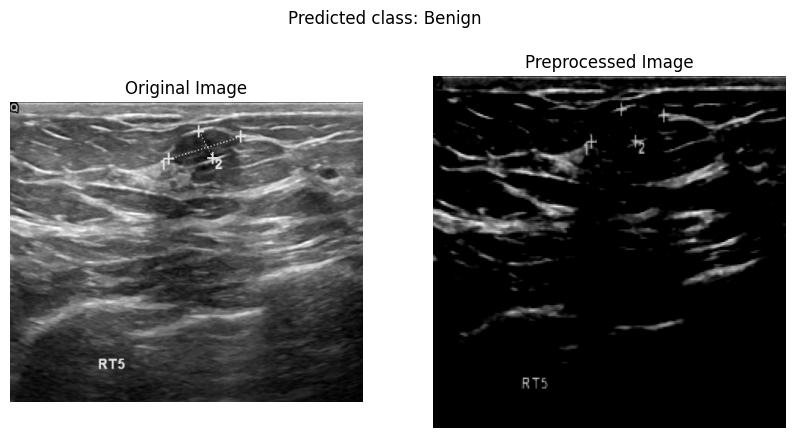

In [ ]:
import torch, os
from torchvision import transforms
from PIL import Image
from src.model import get_vit_model  # Import your model function
import matplotlib.pyplot as plt

# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_dir = '/content/breast_cancer_detection/models/'
model_path = os.path.join(model_dir, 'vit_breast_cancer_last.pth')
# Load the state dictionary with map_location to the appropriate device
state_dict = torch.load(model_path, map_location=device)

# Create an instance of the model
model = get_vit_model(num_classes=3)  # Make sure to match the number of classes

# Load the state dictionary into the model
model.load_state_dict(state_dict)

# Move the model to the GPU if available
model.to(device)

# Set the model to evaluation mode
model.eval()

# Define data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load and preprocess the input image
image_path = '/content/breast_cancer_detection/data/raw/malignant/malignant (10).png' # '/img_path/img.png'
# '/content/breast_cancer_detection/data/raw/benign/benign (100).png'
image = Image.open(image_path).convert('RGB')  # Convert to RGB mode

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Preprocess the image
preprocessed_image = transform(image).unsqueeze(0)  # Add batch dimension

# Move the input to the device
preprocessed_image = preprocessed_image.to(device)

# Make predictions
with torch.no_grad():
    outputs = model(preprocessed_image)

# Interpret the prediction
_, predicted = torch.max(outputs, 1)
class_names = ['Benign', 'Malignant', 'Normal']
predicted_class = class_names[predicted.item()]

# Display the preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image.cpu().squeeze().permute(1, 2, 0))  # Move tensor to CPU for displaying
plt.title('Preprocessed Image')
plt.axis('off')

# Show the images and prediction
plt.suptitle(f'Predicted class: {predicted_class}')
plt.show()